# Newton's Law of Gravitation

In this notebook we will demonstrate how we can derive Newton's Law of Gravitation using Hamilton's principle.

We will begin by importing the relevant python packages and defining some constants.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants and initial conditions
G = 39.5       # Gravitational constant (choose units)
M = 1.0       # Central mass
m = 3.0e-6       # Orbiting mass (can set m=1 for simplicity)
r0 = np.array([1.0, 0.0])  # Initial position
v0 = np.array([0.0, 6.28])  # Initial velocity (adjust for orbit shape)

The lagrangian for a mass in orbit around another is given by

$$ L = \frac{1}{2} m \dot{r}^2 - \frac{G M m}{r}.$$

The Euler-Lagrange equation states

$$\frac{d}{dt}\frac{\delta L}{\delta \dot{r}} - \frac{\delta L}{\delta r} = 0,$$

and for our problem

$$\frac{d}{dt} \frac{\delta L}{\delta \dot{x}} = m \ddot{r}$$

and 

$$\frac{\delta L}{\delta r} = \frac{G M m}{r^2}$$

then

$$m \ddot{r} - \frac{G M m}{r^2} = 0.$$

So the acceleration is given by

$$ \ddot{r} = \frac{G M}{r^2}$$

Since $r$ is a vector with an $x$ and $y$ component to work out the acceleration in $x$ and $y$ we have to multiply by $x/|r|$ or $y/|r|$ such that 

$$ a_x = \frac{G M x}{r^3}$$ 

$$ a_y = \frac{G M y}{r^3}$$ 


We can then evolve the trajectory of our mass m over time by calculating the acceleration at $t_i$ and evolving the position and velocity accordingly.

In [2]:
def gravity_equations(t, y):
    x, y_pos, vx, vy = y
    r = np.sqrt(x**2 + y_pos**2)
    ax = -G * M * x / r**3
    ay = -G * M * y_pos / r**3
    return [vx, vy, ax, ay]

# Time span and initial state
t_span = (0, 1)
y0 = np.array([r0[0], r0[1], v0[0], v0[1]])

# Solve ODE
sol = solve_ivp(gravity_equations, t_span, y0, 
                t_eval=np.linspace(*t_span, 500),
                rtol=1e-9, atol=1e-12)

x = sol.y[0]
y = sol.y[1]

Once we have solved for the path over time between $t_0$ and $t_1$ we can plot the path taken by mass m.

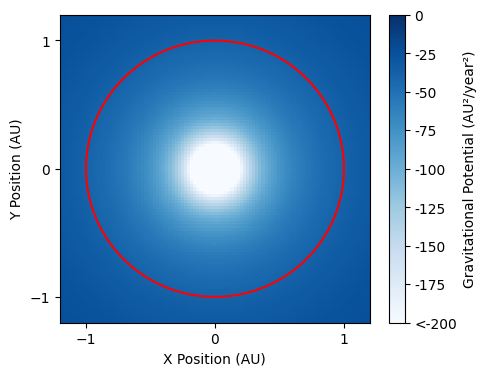

In [10]:
x = sol.y[0]
y = sol.y[1]
# Plot orbit
plt.figure(figsize=(5, 4))
plt.plot(x, y, c='r')

#plt.plot(0, 0, 'ro', label='Central Mass', markersize=20)

plt.axis('equal')


X, Y = np.meshgrid(np.linspace(-1.2, 1.2, 100), np.linspace(-1.2, 1.2, 100))
V = -G * M / np.sqrt(X**2 + Y**2)

plt.imshow(V, extent=(X.min(), X.max(), Y.min(), Y.max()),
           origin='lower', cmap='Blues', aspect='auto',
           vmin=-200, vmax=0)
cbar = plt.colorbar(label='Gravitational Potential (AU²/year²)')

# Get current ticks and modify the bottom one
ticks = cbar.get_ticks()
tick_labels = [f'{tick:.0f}' for tick in ticks]
tick_labels[0] = '<-200'  # Replace the first (bottom) tick label

cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)
plt.xlabel('X Position (AU)')
plt.ylabel('Y Position (AU)')
plt.xticks([1.0, 0.0, -1.0])
plt.yticks([1.0, 0.0, -1.0])

plt.savefig('orbit.png', dpi=300)

You can see that the orbit of the planet is circular. If you change the masses M and m and the initial radius you will see that for some combinations the orbit is ellipsoidal and for others its unstable.